In [78]:
#SBC script


import os
import io
import sys
import warnings
import datetime
import numpy as np
import base64
import dotenv
import yfinance
from yfinance.utils import _parse_user_dt

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from IPython.display import HTML

from openbb_terminal.reports import widget_helpers as widgets
from openbb_terminal.sdk import openbb
from openbb_terminal import config_terminal as cfg
from openbb_terminal.helper_classes import TerminalStyle
from openbb_terminal.core.config.paths import USER_ENV_FILE, REPOSITORY_DIRECTORY
import yfinance as yf
import pandas as pd

from jinja2 import Template

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

datetime.datetime.now() 

datetime.datetime(2023, 2, 6, 16, 33, 0, 631716)

In [79]:
tickers = ["TSLA","SNAP","GOOG","GTLB", "MSFT","AAPL", "META", "PINS", "MTCH"]
# tickers = ["TSLA","SNAP"]

In [82]:
df = pd.DataFrame(columns=["Ticker", "SBC"])

for ticker in tickers:
    cash_flow = openbb.stocks.fa.cash(ticker, source="YahooFinance")
    SBC = cash_flow.loc["Stock-based compensation"].iloc[0]
    print(SBC)
    
    tickerinfo = yf.Ticker(ticker)
    info = tickerinfo.fast_info
    market_cap = info["market_cap"]
    market_cap
    
    df = df.append({"Ticker": ticker, "SBC": SBC, "Market Cap": market_cap}, ignore_index=True)

    print("Done with ", ticker)

df['SBC/Market Cap'] = df['SBC'] / df['Market Cap']    
    

1560000000.0
Done with  TSLA
1387787000.0
Done with  SNAP
18216000000.0
Done with  GOOG
101693000.0
Done with  GTLB
8633000000.0
Done with  MSFT
9038000000.0
Done with  AAPL
11391000000.0
Done with  META
466211000.0
Done with  PINS
203880000.0
Done with  MTCH


In [83]:
df['SBC'] = df['SBC'].apply(lambda x: '{:,.0f}'.format(x/1000))
df['Market Cap'] = df['Market Cap'].apply(lambda x: '{:,.0f}'.format(x/1000))
df['SBC/Market Cap'] = df['SBC/Market Cap'].apply(lambda x: '{:,.1%}'.format(x))
df

,Ticker,SBC,Market Cap,SBC/Market Cap
0,TSLA,"1,560,000","616,240,117",0.3%
1,SNAP,"1,387,787","19,086,774",7.3%
2,GOOG,"18,216,000","1,322,181,037",1.4%
3,GTLB,"101,693","7,519,431",1.4%
4,MSFT,"8,633,000","1,911,344,461",0.5%
5,AAPL,"9,038,000","2,400,656,785",0.4%
6,META,"11,391,000","482,386,592",2.4%
7,PINS,"466,211","18,915,862",2.5%
8,MTCH,"203,880","13,255,862",1.5%


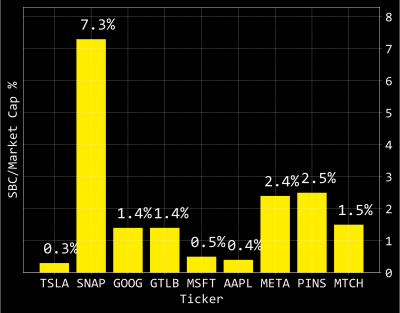

In [84]:
import matplotlib.pyplot as plt

# Remove the '%' sign from each value in the list
sbc_market_cap = [float(x.strip('%')) for x in df['SBC/Market Cap']]

# Plot the data
plt.bar(df['Ticker'], sbc_market_cap)
plt.xlabel('Ticker')
plt.ylabel('SBC/Market Cap %')
plt.ylim(0, max(sbc_market_cap) + 1)

# Add the value on top of each bar
for i, v in enumerate(sbc_market_cap):
    plt.text(i - 0.3, v + 0.3, str(v) + '%')

plt.show()


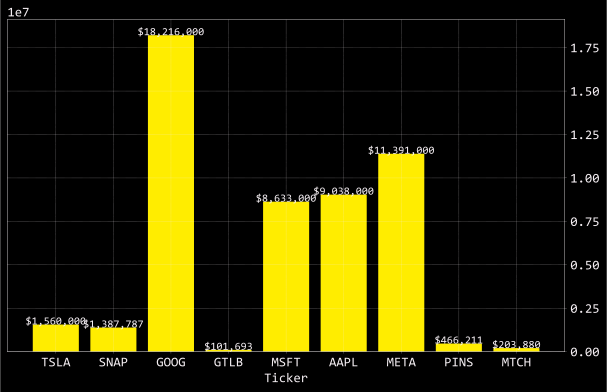

In [97]:
import matplotlib.pyplot as plt

y = df['SBC'].apply(lambda x: int(x.replace(',', '')))
x = df['Ticker']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)

# Add the value labels on top of the bars
for i, v in enumerate(y):
    ax.text(i, v, f'${v:,.0f}', ha='center', fontsize=11)

# Set the x-axis label
ax.set_xlabel('Ticker')

plt.show()
